<a href="https://colab.research.google.com/github/Kr9096/Machine-Learning-Projects/blob/main/Government_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis on Government Dataset.
Applying basic commands on the data to get an overview.

In [ ]:
# Import the Required libraries

import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Import the data

df = pd.read_csv("/content/drive/MyDrive/Data Analysis/3. Police Data.csv")

In [ ]:
# Overview of the data

In [ ]:
df.shape  # We are dealing with 65k rows and 15 columns

(65535, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

In [ ]:
df.dtypes

stop_date              object
stop_time              object
country_name          float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [ ]:
df.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [ ]:
df.sample(5)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
37468,9/22/2009,9:59,NaN,M,1965.0,44.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False
23637,2/6/2008,12:21,NaN,M,1986.0,22.0,Asian,Other Traffic Violation,Moving violation,True,Incident to Arrest,Arrest Driver,True,30+ Min,False
5861,4/21/2006,7:25,NaN,F,1968.0,38.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,16-30 Min,False
33311,3/17/2009,8:29,NaN,M,1980.0,29.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
27240,7/8/2008,2:10,NaN,F,1982.0,26.0,Asian,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


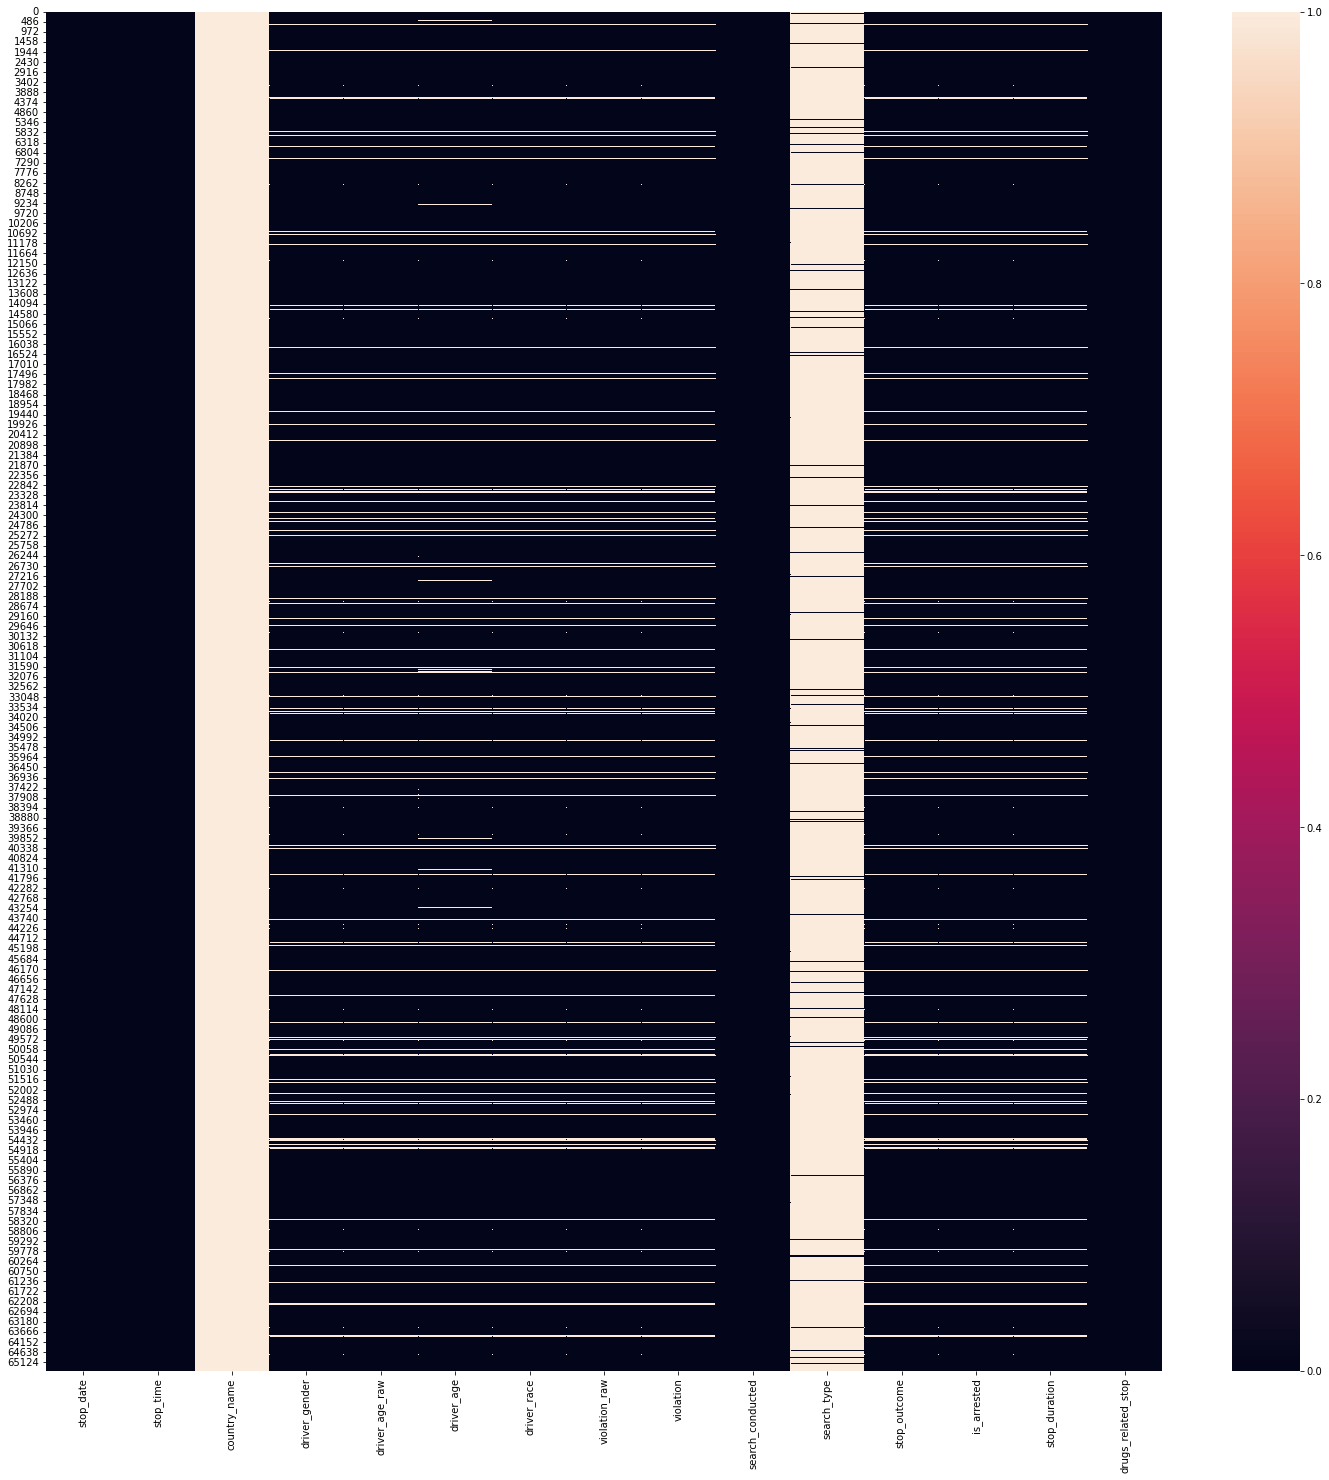

In [ ]:
# Visualize the null values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [ ]:
# We have a lot of null values, so it is better to look at them carefully

null_var = df.isnull().sum()/df.shape[0] * 100   # The country_name and search_type has almost 100% of null values, so it is better to drop those columns and the other null values is filled by using the following methods.
null_var

stop_date               0.000000
stop_time               0.000000
country_name          100.000000
driver_gender           6.196689
driver_age_raw          6.186007
driver_age              6.572061
driver_race             6.195163
violation_raw           6.195163
violation               6.195163
search_conducted        0.000000
search_type            96.217288
stop_outcome            6.195163
is_arrested             6.195163
stop_duration           6.195163
drugs_related_stop      0.000000
dtype: float64

In [ ]:
# This is the one way droping

df.drop(["country_name","search_type"],axis = 1)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False


In [ ]:
# Another way of droping the columns

df3 = df.drop(null_var[null_var > 20].keys(),axis=1)  # Assign the cleaned df to df3
df3 = df3.dropna()

In [ ]:
print("Shape of original df",df.shape)
print("Shape of cleaned df",df3.shape)
print("Null values in original df \n\n",df.isnull().sum())
print("\nNull values in cleaned df \n\n",df3.isnull().sum())

Shape of original df (65535, 15)
Shape of cleaned df (61222, 13)
Null values in original df 

 stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

Null values in cleaned df 

 stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64


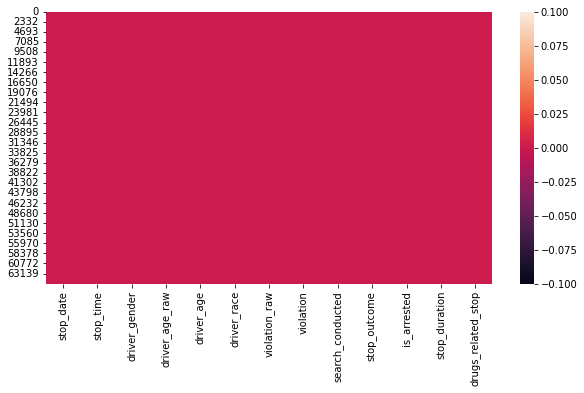

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df3.isnull())

In [ ]:
df.dtypes

stop_date              object
stop_time              object
country_name          float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

# Compare the data before the null values and after the null values. "Numerical data"

In [ ]:
df3.select_dtypes(["int64","float64"]).columns

Index(['driver_age_raw', 'driver_age'], dtype='object')

In [ ]:
df_num = ['driver_age_raw', 'driver_age']

(array([1.0000e+00, 1.6000e+01, 2.9000e+01, 8.8000e+01, 1.7400e+02,
        3.1800e+02, 6.7600e+02, 1.3090e+03, 1.9620e+03, 2.0690e+03,
        3.3560e+03, 4.2330e+03, 4.4060e+03, 4.8360e+03, 5.0890e+03,
        6.7060e+03, 8.7930e+03, 1.0563e+04, 5.8360e+03, 7.6200e+02]),
 array([1918. , 1921.9, 1925.8, 1929.7, 1933.6, 1937.5, 1941.4, 1945.3,
        1949.2, 1953.1, 1957. , 1960.9, 1964.8, 1968.7, 1972.6, 1976.5,
        1980.4, 1984.3, 1988.2, 1992.1, 1996. ]),
 <a list of 20 Patch objects>)

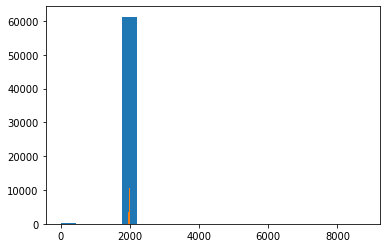

In [ ]:
plt.hist(df["driver_age_raw"],bins=20)
plt.hist(df3["driver_age_raw"],bins=20)

In [ ]:
# Fill the nan values in mian df with 0, it will be easy to plot the hist and moreover null values in nothing but 0.

df_na = df.fillna(0)

df_na.isnull().sum().sum()

0

In [ ]:

df3.isnull().sum().sum()

0

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

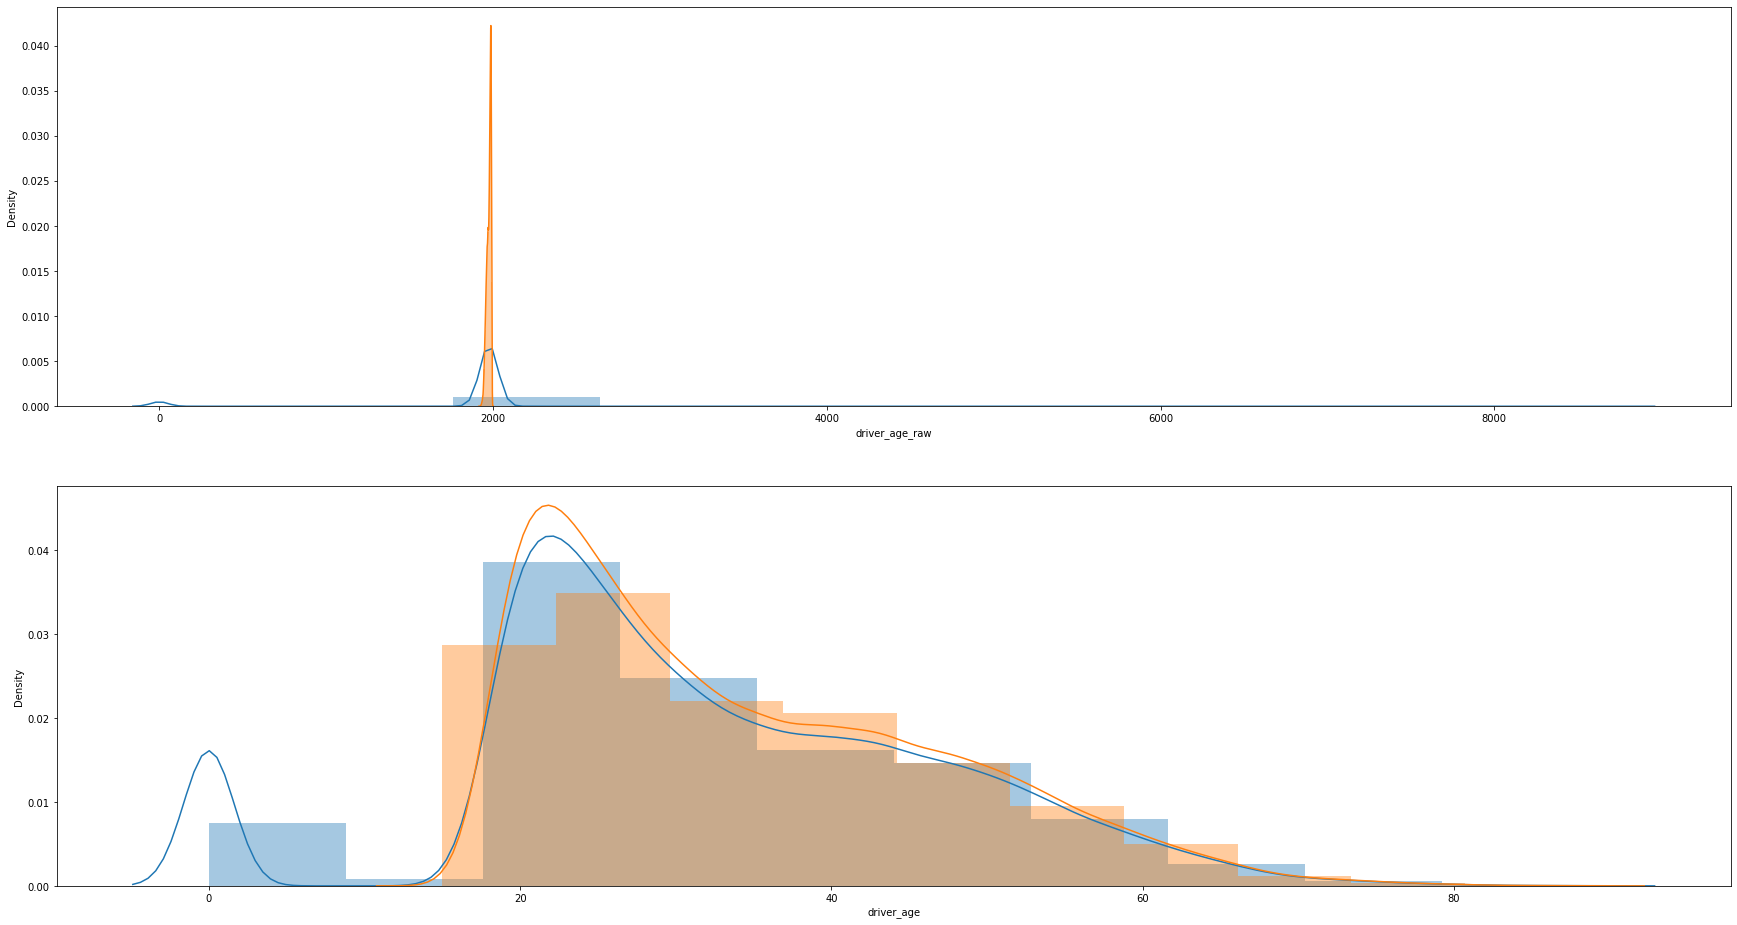

In [ ]:
# plot the numerical values 

plt.figure(figsize=(30,25))

for i,var in enumerate(df_num):
  plt.subplot(3,1,i+2)
  sns.distplot(df_na[var],bins=10)
  sns.distplot(df3[var],bins=10)

# Orange bins shows the data with null values and the blue bins is the data without the null values
# The orange bins shows the disturbance.

# For Categorical values

In [ ]:
df3.select_dtypes(["object"]).columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'stop_outcome', 'is_arrested',
       'stop_duration'],
      dtype='object')

In [ ]:
df_cat = ['stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'stop_outcome', 'is_arrested',
       'stop_duration']

In [ ]:
# Compare the value counts in both data frames

pd.concat([df["driver_gender"].value_counts() / df.shape[0] * 100, df3["driver_gender"].value_counts() / df.shape[0] * 100 ],axis=1,keys=["driver_gender_withna","driver_gender_withoutna"])

# Very minor change

,driver_gender_withna,driver_gender_withoutna
M,68.915846,68.584726
F,24.887465,24.834058


In [ ]:
# Lets do it for all the variables

def cat_comp(var):
  return pd.concat([df[var].value_counts() / df.shape[0] * 100, df3[var].value_counts() / df.shape[0] * 100 ],axis=1,keys=[var+"_withna",var+"_withoutna"])

for i in df_cat:
  print(cat_comp(i))


       stop_time_withna  stop_time_withoutna
11:00          0.427253             0.392157
10:00          0.427253             0.402838
9:00           0.384527             0.361639
10:30          0.383001             0.361639
9:30           0.375372             0.349432
...                 ...                  ...
5:42           0.001526                  NaN
4:56           0.001526             0.001526
5:25           0.001526             0.001526
4:57           0.001526             0.001526
4:54           0.001526             0.001526

[1432 rows x 2 columns]
   driver_gender_withna  driver_gender_withoutna
M             68.915846                68.584726
F             24.887465                24.834058
          driver_race_withna  driver_race_withoutna
White              69.805447              69.538415
Black              12.614633              12.547494
Hispanic            8.561837               8.519112
Asian               2.500954               2.493324
Other               0.321965

In [ ]:
# Very little variation, the cahange is almost negligible.

# Data Cleaning (Central Tendency)

In [ ]:
# Numerical 

df_num1 = df.select_dtypes(["int64","float64"])
df_num1.head()

,country_name,driver_age_raw,driver_age
0,NaN,1985.0,20.0
1,NaN,1965.0,40.0
2,NaN,1972.0,33.0
3,NaN,1986.0,19.0
4,NaN,1984.0,21.0


In [ ]:
df_num1.drop("country_name",axis=1,inplace=True)
df_num1.isnull().sum()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


driver_age_raw    4054
driver_age        4307
dtype: int64

In [ ]:
# Lets extract the column names with null values

df_num1_col = [i for i in df_num1.columns if df_num1[i].isnull().sum() > 0]
df_num1_col

['driver_age_raw', 'driver_age']

In [ ]:
# Fill the null values with 0 and plot the distplot on the original df

df_num1_withna = df_num1.fillna(0)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


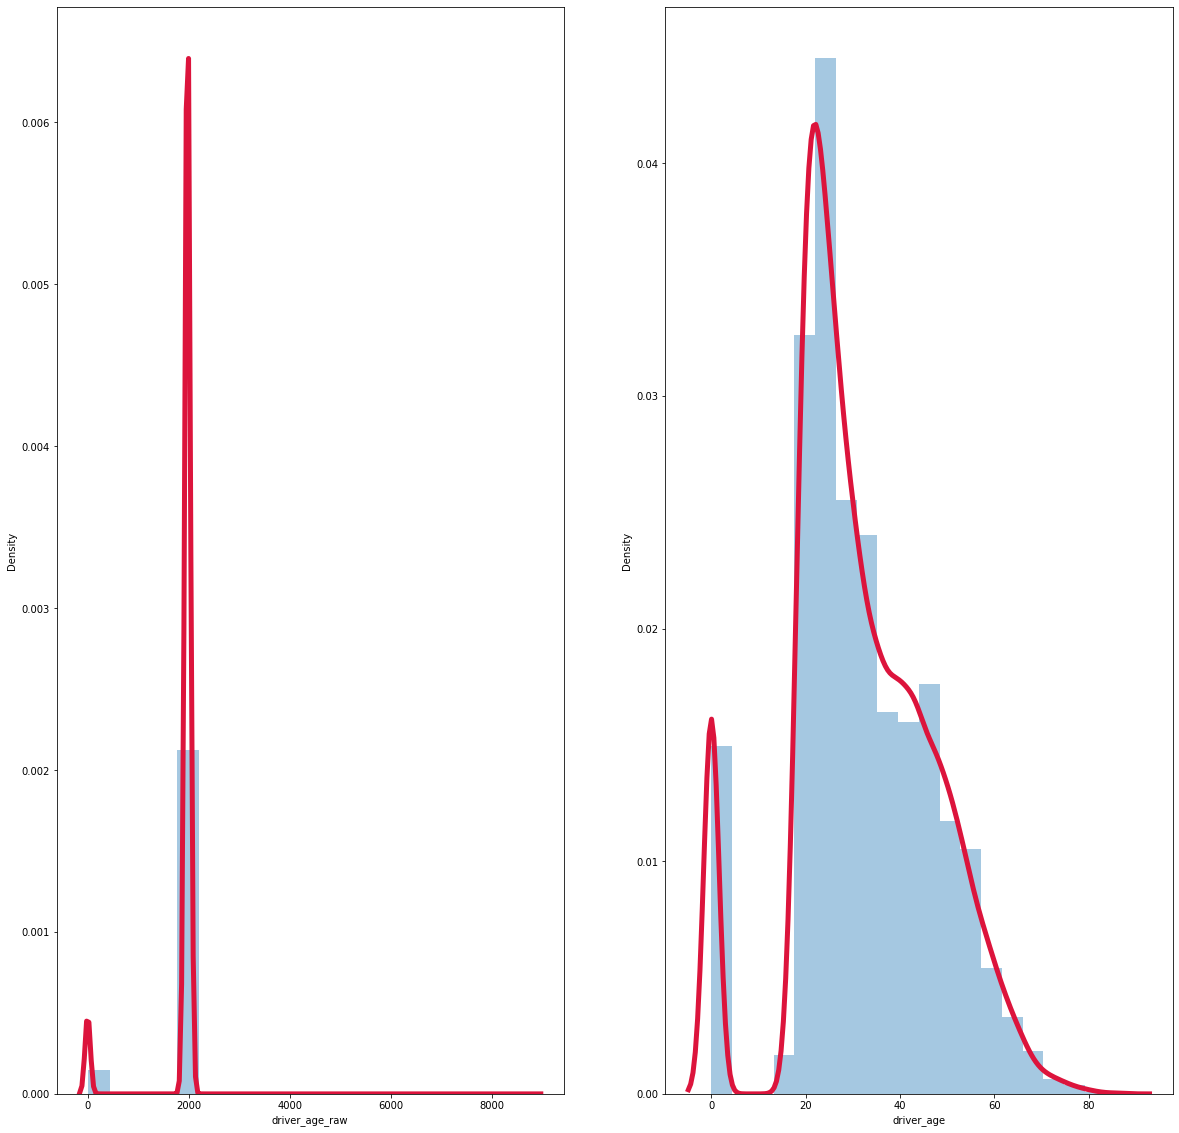

In [ ]:
plt.figure(figsize=(20,20))

for ind,i in enumerate(df_num1_col):
  plt.subplot(1,2,ind+1)
  sns.distplot(df_num1_withna[i], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

# With the null values

# Mean

In [ ]:
# Compare both plots with null values and with mean
df_num1_mean = df_num1.fillna(df_num1.mean())

In [ ]:
df_num1_mean.isnull().sum()

driver_age_raw    0
driver_age        0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

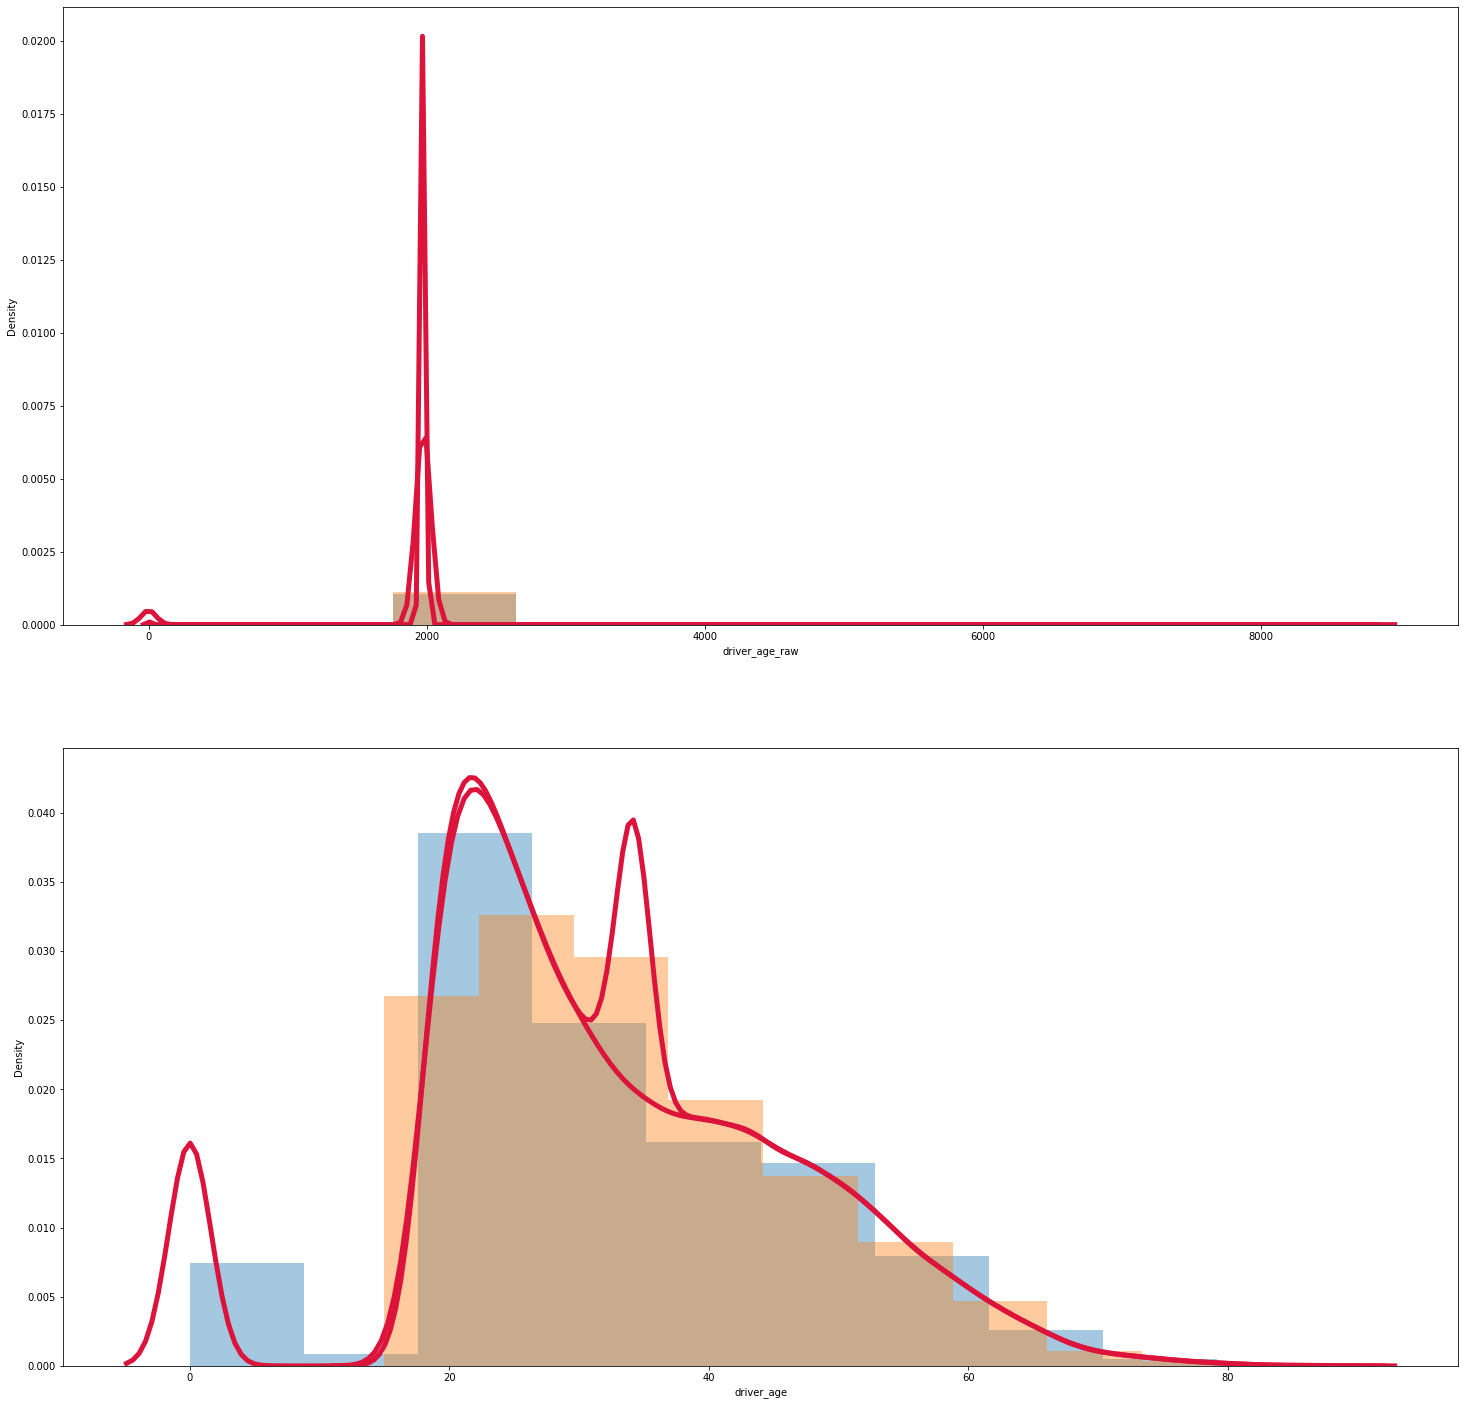

In [ ]:
plt.figure(figsize=(25,25))
for indx,i in enumerate(df_num1_col):
  plt.subplot(2,1,indx+1)
  sns.distplot(df_num1_withna[i], bins=10, kde_kws={'linewidth':5, 'color':'#DC143C'})
  sns.distplot(df_num1_mean[i], bins=10, kde_kws={'linewidth':5, 'color':'#DC143C'})

# The orange bins shows the cleaned data with mean, It shows the reduction of noise.



# Median

In [ ]:
# Follow the same steps for Median

df_num1_median = df_num1.fillna(df_num1.median())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

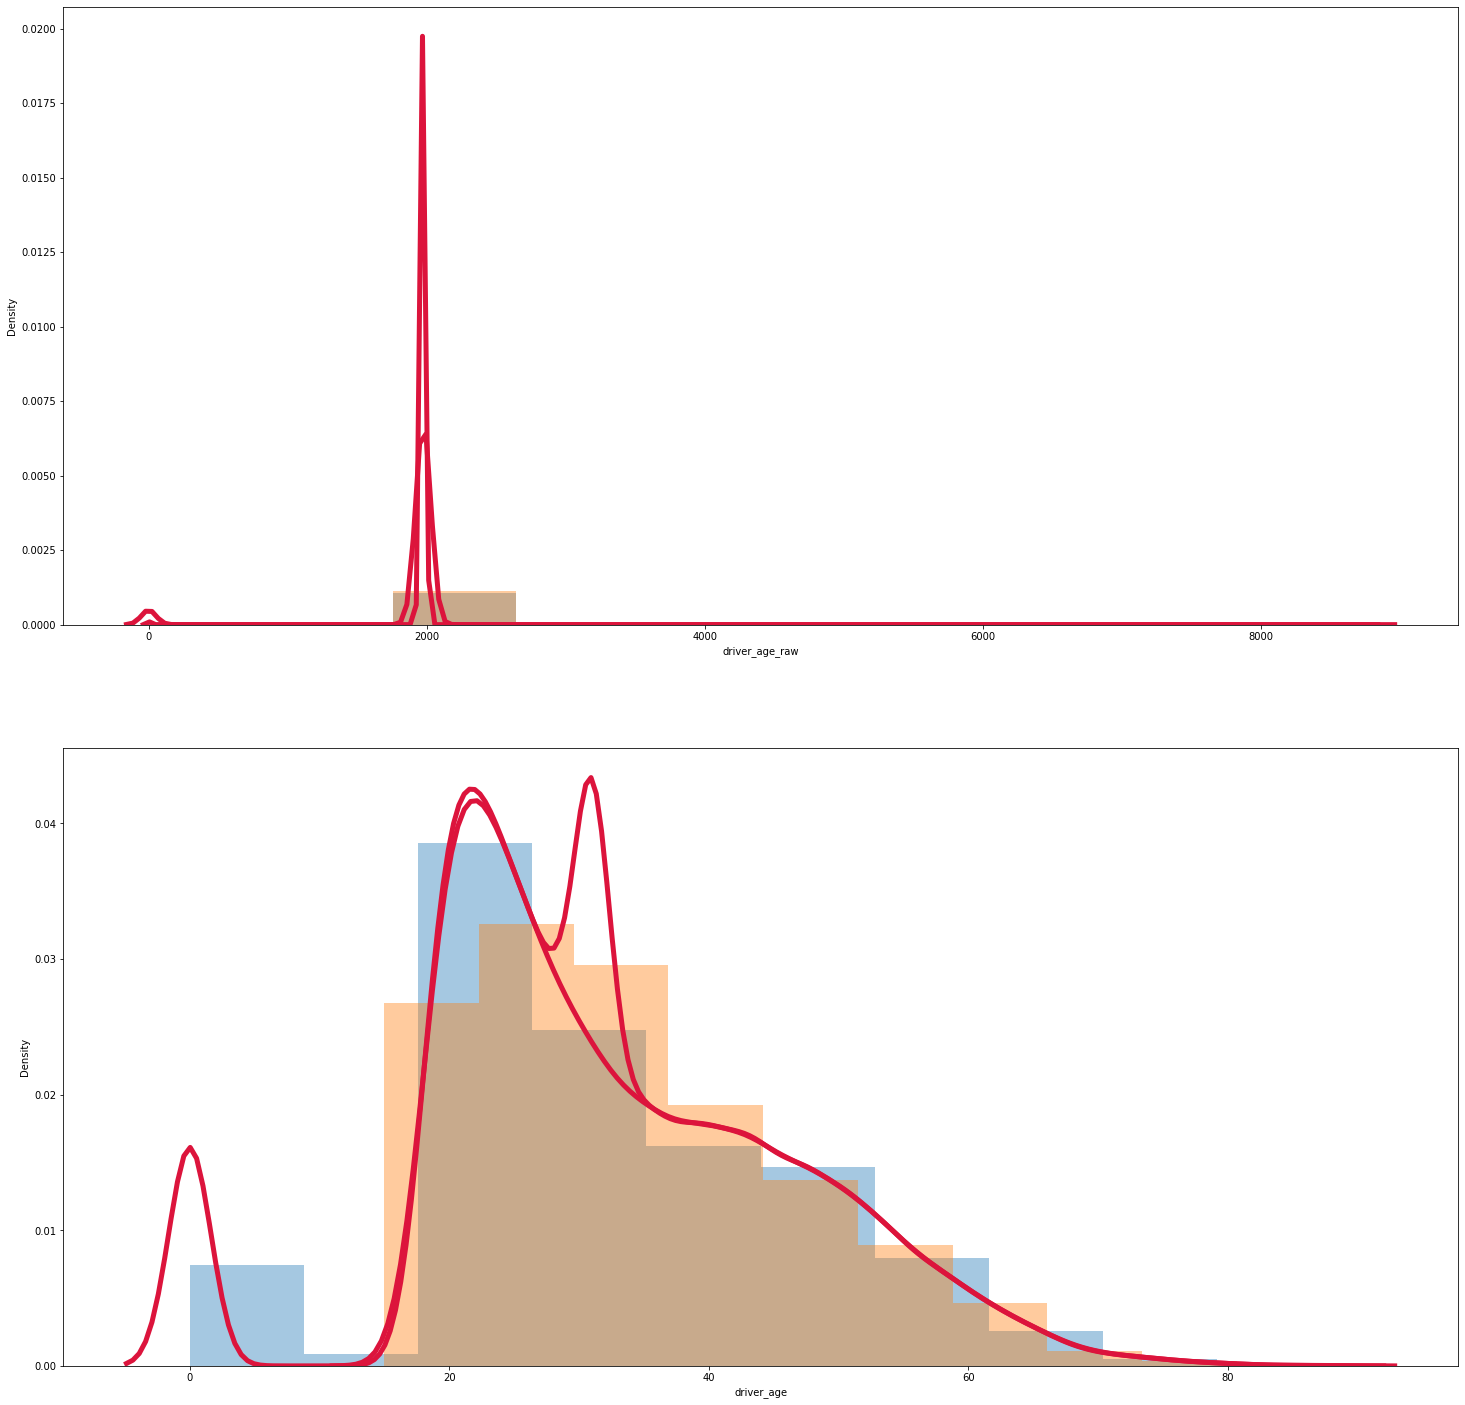

In [ ]:
plt.figure(figsize=(25,25))
for indx,i in enumerate(df_num1_col):
  plt.subplot(2,1,indx+1)
  sns.distplot(df_num1_withna[i], bins=10, kde_kws={'linewidth':5, 'color':'#DC143C'})
  sns.distplot(df_num1_median[i], bins=10, kde_kws={'linewidth':5, 'color':'#DC143C'})

# The orange bins shows the cleaned data with mean, It shows the reduction of noise.
# Slight difference between mean and median

# boxplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

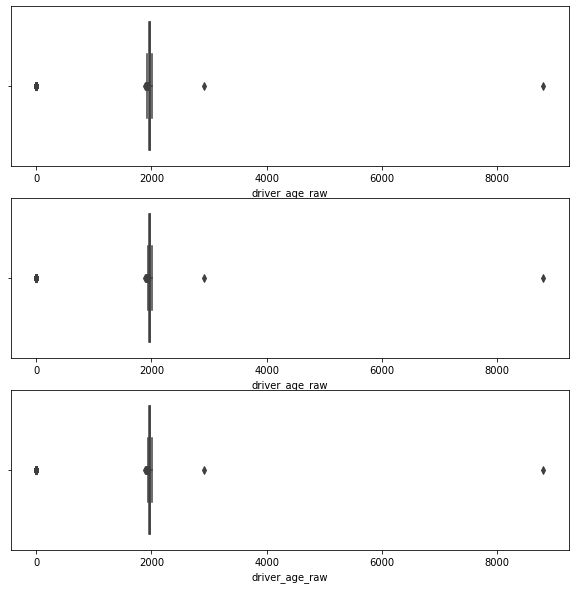

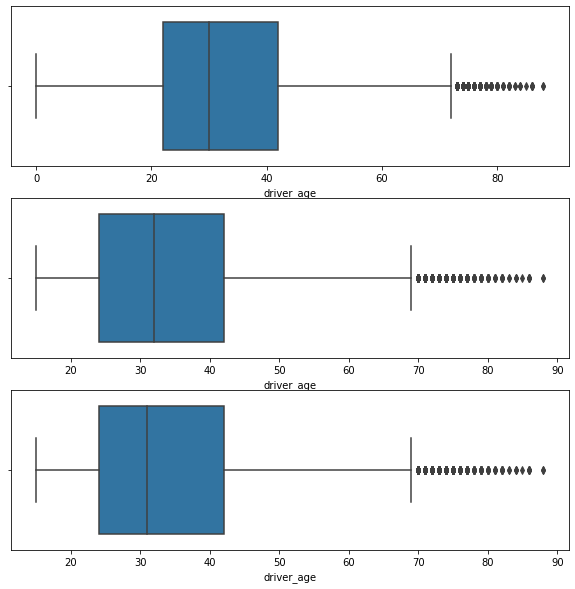

In [ ]:
# To find the outliers and to find the difference between the other methods.

for i, var in enumerate(df_num1_col):
    plt.figure(figsize=(10,10))
    plt.subplot(3,1,1)
    sns.boxplot(df_num1_withna[var])

    plt.subplot(3,1,2)
    sns.boxplot(df_num1_mean[var])

    plt.subplot(3,1,3)
    sns.boxplot(df_num1_median[var])
    

In [ ]:
# Concat all the approaches

pd.concat([df_num1[df_num1_col],df_num1_mean[df_num1_col],df_num1_median[df_num1_col]],axis=1)

,driver_age_raw,driver_age,driver_age_raw,driver_age,driver_age_raw,driver_age
0,1985.0,20.0,1985.000000,20.000000,1985.0,20.0
1,1965.0,40.0,1965.000000,40.000000,1965.0,40.0
2,1972.0,33.0,1972.000000,33.000000,1972.0,33.0
3,1986.0,19.0,1986.000000,19.000000,1986.0,19.0
4,1984.0,21.0,1984.000000,21.000000,1984.0,21.0
...,...,...,...,...,...,...
65530,1987.0,25.0,1987.000000,25.000000,1987.0,25.0
65531,1954.0,58.0,1954.000000,58.000000,1954.0,58.0
65532,1985.0,27.0,1985.000000,27.000000,1985.0,27.0
65533,NaN,NaN,1967.791106,34.148984,1978.0,31.0


# Filling null values by using classes

In [ ]:
df.columns

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

#### we will consider driver_race for defining these two numerical columns.

In [ ]:
df["driver_race"].isnull().sum()

4060

In [ ]:
df_t = df
df_t["driver_race"].fillna(df_t["driver_race"].mode()[0],inplace=True)

In [ ]:
df_t["driver_race"].isnull().sum()

0

In [ ]:
# We filled the null values for numerical columns by using the mean of there particular class

import numpy as np
for j in df_num1_col:
  for i in df_t["driver_race"].value_counts().keys():
    df_t.update(df_t[df_t["driver_race"] == i][j].replace(np.nan,df_t[df_t["driver_race"] == i][j].mean()))



In [ ]:
df_t.drop(["country_name","search_type"],axis = 1,inplace = True) # Explanation was given above
df_t.isnull().sum()

stop_date                0
stop_time                0
driver_gender         4061
driver_age_raw           0
driver_age               0
driver_race              0
violation_raw         4060
violation             4060
search_conducted         0
stop_outcome          4060
is_arrested           4060
stop_duration         4060
drugs_related_stop       0
dtype: int64

# Categorical variables

In [ ]:

df_catg = df_t.select_dtypes(["object"])

In [ ]:
df_catg1 = df_catg.isnull().sum() / df_catg.shape[0] * 100  
#df_catg.isnull().mean() * 100
# 6% of the columns contains the null values, so it is better to impute the null values by mode

stop_date           0
stop_time           0
driver_gender    4061
driver_race         0
violation_raw    4060
violation        4060
stop_outcome     4060
is_arrested      4060
stop_duration    4060
dtype: int64

In [ ]:
# Get all the null value columns 

df_catg_col = df_catg1[df_catg1 > 0].keys()

In [ ]:
# All the null values are filled with the mode.
for i in df_catg_col:
  df_catg[i].fillna(df_catg[i].mode()[0],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_catg.isnull().sum().sum()

0

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: ignored

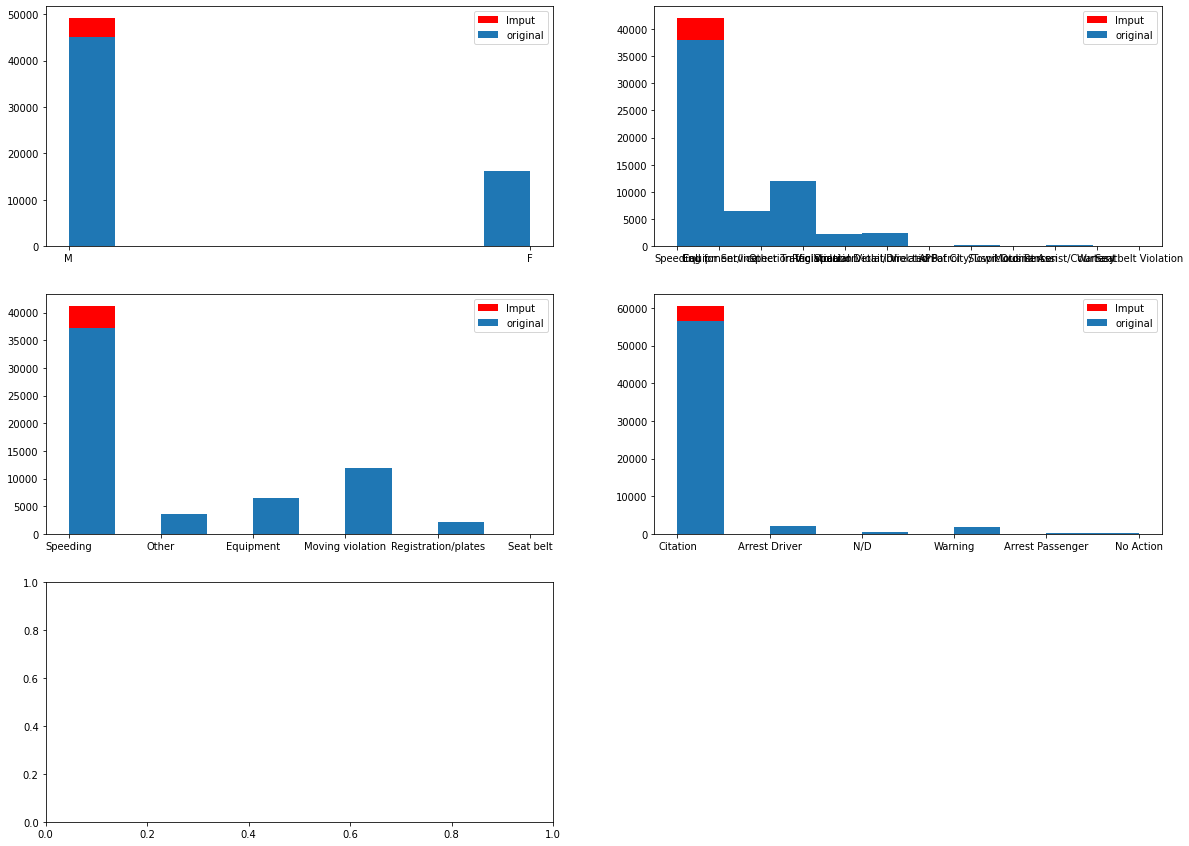

In [ ]:
# Visualize the data

plt.figure(figsize=(20,15))
for indx,i in enumerate(df_catg_col):
  plt.subplot(3,2,indx+1)
  plt.hist(df_catg[i], label='Imput', color='red')
  plt.hist(df[i].dropna(), label='original')
  plt.legend()

In [ ]:
# Updating to the main frame

df_t.update(df_catg)


In [ ]:
df_t.isnull().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

#### Finally we got the cleaned data.

# Fill the missing values with Sklearn

In [ ]:
from sklearn.impute import SimpleImputer


In [ ]:
df.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [ ]:
df_sk = df.drop(["country_name","search_type"],axis = 1)
df_sk.sample(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
54636,12/14/2011,13:25,M,1989.0,22.0,Black,Other Traffic Violation,Moving violation,False,Citation,False,0-15 Min,False
56754,2/15/2012,17:09,M,1985.0,27.0,White,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False
33607,3/27/2009,17:31,M,1987.0,22.0,Black,Speeding,Speeding,False,Citation,False,16-30 Min,False


In [ ]:
# First we will do it one by one, after that we will use pipelines to fill all at once.

# Select the numerical columns

df_num

['driver_age_raw', 'driver_age']

In [ ]:
# Impute the strategy
imp_mean = SimpleImputer(strategy = 'mean')


In [ ]:
# Fit the numerical columns

imp_mean.fit(df_sk[df_num])
imp_mean.statistics_

array([1967.7911062 ,   34.14898412])

In [ ]:
# Lets do it manually to verify it
df_sk[df_num].mean()


driver_age_raw    1967.791106
driver_age          34.148984
dtype: float64

In [ ]:
# Transform the column

df_sk[df_num] = imp_mean.transform(df_sk[df_num])

In [ ]:
df_sk[df_num].isnull().sum()

# All null values are filled with mean

driver_age_raw    0
driver_age        0
dtype: int64

In [ ]:
# Categorical values

In [ ]:
# Select the categorical  columns
df_catg_sk = df_sk.select_dtypes(["object"]).keys()

In [ ]:
# Impute the strategy
imp_mode = SimpleImputer(strategy = "most_frequent")
imp_mode.fit(df_sk[df_catg_sk])

SimpleImputer(strategy='most_frequent')

In [ ]:
imp_mode.statistics_

array(['1/11/2012', '10:00', 'M', 'White', 'Speeding', 'Speeding',
       'Citation', False, '0-15 Min'], dtype=object)

In [ ]:
# Transform those columns

df_sk[df_catg_sk] = imp_mode.transform(df_sk[df_catg_sk])

In [ ]:
df_sk.isnull().sum().sum()

0

### We cleaned the data by using sklearn.

# Lets do it all together in one step by using Pipelines and Columntransformer

In [ ]:
# Required libraries
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [ ]:
df_sk1 = df.drop(["country_name","search_type"],axis = 1)
df_sk1.sample(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
59928,5/16/2012,0:08,M,1964.0,48.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
5210,3/30/2006,0:10,M,1987.0,19.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
19510,8/19/2007,16:16,F,1974.0,33.0,White,Other Traffic Violation,Moving violation,False,Citation,False,16-30 Min,False


In [ ]:
df_num

['driver_age_raw', 'driver_age']

In [ ]:
df_sk1.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop'],
      dtype='object')

In [ ]:
df_catg.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'stop_outcome', 'is_arrested',
       'stop_duration'],
      dtype='object')

In [ ]:
# Seperate the column names
imp_mean = ['driver_age_raw']
imp_median = ['driver_age']
imp_mode = ['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation']
imp_constant = ['stop_outcome', 'is_arrested',
       'stop_duration']

In [ ]:
# Create the pipeline

imp_pipe_mean = Pipeline(steps = [("imputer",SimpleImputer(strategy = "mean"))])
imp_pipe_median = Pipeline(steps = [("imputer",SimpleImputer(strategy = "median"))])
imp_pipe_mode = Pipeline(steps = [("imputer",SimpleImputer(strategy = "most_frequent"))])
imp_pipe_constant = Pipeline(steps = [("imputer",SimpleImputer(strategy = "constant",fill_value = "miss"))])



In [ ]:
# Columntransformer

transform_sk = ColumnTransformer(transformers = [("mean_imputer",imp_pipe_mean,imp_mean),
                                              ("median_imputer",imp_pipe_median,imp_median),
                                              ("mode_imputer",imp_pipe_mode,imp_mode), 
                                              ("constant_imputer",imp_pipe_constant,imp_constant)])


In [ ]:
transform_sk.transform  # To view the pipeline

<bound method ColumnTransformer.transform of ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['driver_age_raw']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['driver_age']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['stop_date', 'stop_time', 'driver_gender',
                                  'driver_race', 'violation_raw',
                                  'violation']),
                                ('constant_imputer',
                                 Pipeline(steps=[('imputer',
            

In [ ]:
# Fit the data to this transformer

transform_sk.fit(df_sk1)

ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['driver_age_raw']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['driver_age']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['stop_date', 'stop_time', 'driver_gender',
                                  'driver_race', 'violation_raw',
                                  'violation']),
                                ('constant_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleI

In [ ]:
# Transform the data

df_sk2 = transform_sk.transform(df_sk1)

In [ ]:
# Creating the df

df_sk1_f = pd.DataFrame(df_sk2, columns = imp_mean + imp_median + imp_mode + imp_constant   )

In [ ]:
# No null values
df_sk1_f.isnull().sum()

driver_age_raw    0
driver_age        0
stop_date         0
stop_time         0
driver_gender     0
driver_race       0
violation_raw     0
violation         0
stop_outcome      0
is_arrested       0
stop_duration     0
dtype: int64

In [ ]:
# To view the transformers and startegy

transform_sk.transformers_

[('mean_imputer',
  Pipeline(steps=[('imputer', SimpleImputer())]),
  ['driver_age_raw']),
 ('median_imputer',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))]),
  ['driver_age']),
 ('mode_imputer',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent'))]),
  ['stop_date',
   'stop_time',
   'driver_gender',
   'driver_race',
   'violation_raw',
   'violation']),
 ('constant_imputer', Pipeline(steps=[('imputer',
                   SimpleImputer(fill_value='miss', strategy='constant'))]), ['stop_outcome',
   'is_arrested',
   'stop_duration']),
 ('remainder', 'drop', [8, 12])]

In [ ]:
transform_sk.named_transformers_["mean_imputer"].named_steps["imputer"].statistics_

transform_sk.named_transformers_["mode_imputer"].named_steps["imputer"].statistics_



array(['1/11/2012', '10:00', 'M', 'White', 'Speeding', 'Speeding'],
      dtype=object)

## We used pipelines and SimpleImputer to fill null values in one step

In [ ]:
# 2. For speeding were men or women stopped more often?

df[df["violation"] == "Speeding"]["driver_gender"].value_counts()

M    25517
F    11686
Name: driver_gender, dtype: int64

In [ ]:
df.groupby("driver_gender")

In [ ]:
# Does gender affect who gets searched during a stop?

df[df["search_conducted"] == True]["driver_gender"].value_counts()

M    2113
F     366
Name: driver_gender, dtype: int64

In [ ]:
# Another method

df.groupby("driver_gender").search_conducted.sum()

driver_gender
F     366
M    2113
Name: search_conducted, dtype: int64

In [ ]:
# 4. What is the mean stop_duration?

df["stop_duration"].mode() # This is not what we wants but just playing with it.


0    0-15 Min
dtype: object

In [ ]:
# Lets use map function

df["stop_duration"] = df["stop_duration"].map({"0-15 Min" : 7.5, "16-30 Min" : 24, "30+ Min" : 45 })

In [ ]:
df["stop_duration"].value_counts()

7.5     47379
24.0    11448
45.0     2647
Name: stop_duration, dtype: int64

In [ ]:
df["stop_duration"].mean()  # This is the mean time for stop duration.

12.187420698181345

In [ ]:
# 5. Compare the age distribution for each violation

df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,7.5,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,7.5,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,24.0,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,7.5,False


In [ ]:
df.groupby("violation").driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6516.0,31.685705,11.373132,16.0,23.0,28.0,39.0,81.0
Moving violation,11926.0,36.725917,13.231571,15.0,25.0,35.0,46.0,86.0
Other,3583.0,40.171808,12.612578,16.0,30.0,40.0,49.5,86.0
Registration/plates,2243.0,32.658820,11.143476,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37204.0,33.264729,12.601653,15.0,23.0,30.0,42.0,88.0


In [ ]:
df.isnull().sum()

stop_date                0
stop_time                0
driver_gender         4061
driver_age_raw           0
driver_age               0
driver_race              0
violation_raw         4060
violation             4060
search_conducted         0
stop_outcome          4060
is_arrested           4060
stop_duration         4061
drugs_related_stop       0
dtype: int64

In [ ]:
df.select_dtypes(include =['int64','float64'])

,driver_age_raw,driver_age,stop_duration
0,1985.000000,20.00000,7.5
1,1965.000000,40.00000,7.5
2,1972.000000,33.00000,7.5
3,1986.000000,19.00000,24.0
4,1984.000000,21.00000,7.5
...,...,...,...
65530,1987.000000,25.00000,7.5
65531,1954.000000,58.00000,7.5
65532,1985.000000,27.00000,7.5
65533,1967.798815,34.50792,NaN
